# Homework 8  

**In the first problem I want you to think about loss functions for binary data. The second exercise prepares you for the "multinomial" case where we have more than 2 categories as outcome.**

1. **Fit a logistic regression `default ~ balance` to a random subset of 1000 rows of the default data from the ISLR library.**
    * Predict the default probability on a regular array of balance values between on the interval $[0; 3000]$ and plot the resulting sigmoid-shaped curve.
    * Find those 4 balances which yield predicted probabilities (closest to) $\hat{p} = [0.5, 0.05, 0.005, 0.0005]$.
    * Overlay these 4 points on the plot with a y value of $default=1$ (yes).
    * Compute the following loss functions for each of the four $(y_i, \hat{p}_i)$ pairs and dicsuss their merits/shortcomings:
        * Squared Error: $(y_i - \hat{p}_i)^2$
        * Log Loss: $y_i \cdot \log{\hat{p}_i}$
        * Hinge: `np.max(0, 1 - pHat * y)`
        * Accuracy: $y_i == (\hat{p}_i > 0.5)$**
2. **Multiclass logistic regression: The iris data set contains data on 3 flower types: "setosa", "versicolor", "virginica" (coded as integers $0, 1, 2$).**
    * Fit 3 separate logistic regressions with the binary outcome set to one flower type versus the others.
    * How could you combine these 3 models into one ?
    * Think about possible shortcomings of this "one verus the rest" strategy.

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

**Loading the dataset**

In [2]:
df = pd.read_csv('../data/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


In [3]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


## Task 1

* **Fit a logistic regression `default ~ balance` to a random subset of 1000 rows of the default data from the ISLR library.**

In [4]:
df = df.sample(n=1000, random_state=101)
df["default"].value_counts()

No     967
Yes     33
Name: default, dtype: int64

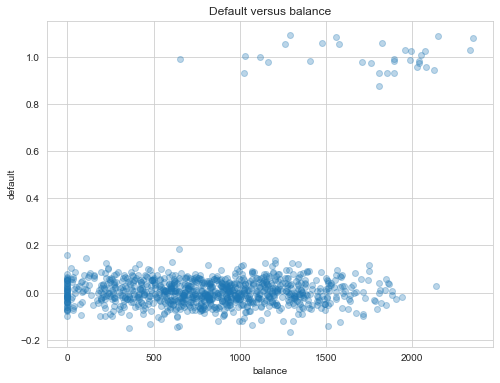

In [5]:
#add jitter to your plot:
df["defaultJitter"] = (df["default"]=="Yes") + 0.05*np.random.randn(len(df))

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(data=df, x="balance", y="defaultJitter", alpha=0.3)
plt.xlabel('balance')
plt.ylabel('default')
plt.title('Default versus balance');

## Task 2

* **Multiclass logistic regression: The iris data set contains data on 3 flower types: "setosa", "versicolor", "virginica" (coded as integers $0, 1, 2$).**

The iris data:

In [6]:
from sklearn import datasets

iris = datasets.load_iris()

# iris

In [7]:
flower_types = iris['target_names']

X_iris = pd.DataFrame(iris['data'], columns=['sepal_length','sepal_width','petal_length','petal_width'])
y_iris = pd.get_dummies(pd.DataFrame(list(map(lambda x: flower_types[x], iris['target'])), columns=['target']))

X_iris.join(y_iris).head()

,sepal_length,sepal_width,petal_length,petal_width,target_setosa,target_versicolor,target_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
